In [1]:
from mpl_toolkits.mplot3d import Axes3D #import 3d diagram
from matplotlib import cm #Colormap import
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
# expect something like this (e.g.): plot_dataframe_with_args([source_data_x,source_data_y,color],[result_data_x, result_data_y, color]) 
def plot_dataframe_with_args(*args):#(x_source, y_source, color_source, x_results, y_results, color_results, add_offset = False):
#     for i in args:
#         if i != args[0]:
    #plt.figure(figsize=(60, 25))
    plt.title('Uebung 2')
    plt.xlabel('Uebung2 - x')
    plt.ylabel('Uebung2 - y')
    for i in args:
        plt.plot(i[0],i[1]) 
    plt.show()

# 2) Implementieren Sie die Hypothese (lineares Modell) als Python Funktion:
# linear_hypothesis(theta)
### 
### Die Pythonfunktion soll dabei eine Funktion zurückgeben:
### >> theta = np.array([1.1, 2.0, -.9]) 
### >> h = linear_hypothesis(theta) 
### >> print h(X) 
### array([ -0.99896965, 20.71147926, ....

In [3]:
## creates linear Hypothesis
## Params: Changable values like m, n -> theta_0,theta_1
##return: hypothesis function with 1 Para (x-values)

#Model-Aufbau: f(x) = C + m*x
#function need at first theta, then x
def hypothesis(theta):
    def tmp(x):
        return np.array(x.dot(theta))
    return tmp


#hypothesis = linear_hypothesis(2.,3.)
#print(hypothesis(np.array([1.,3.])))

# 4) Implementieren Sie die Kostenfunktion J als Python Funktion:
# cost_function(x, y)
### Die Pythonfunktion soll dabei eine Funktion zurückgeben, die
### die den Parametervektor theta aufnimmt.
# 
### >> j = cost_function(X, y) 
### >> print j(theta)
### 41.20  Wert abhaengig von X und y


In [4]:
## cost function
## Params: hypothesis, x , y, hypo+x = y_prediction; y_label = original data


#ich verstehe nicht, dass man eine hypothese als parameter nehmen soll aber zusätzlich die costen funktion eine Funktion zurück liefern soll, die gerade die parameter theta0 und theta1 aufnhemen soll, obwohl diese doch schon mit der hypothese gekommen sind
def cost_function(hypothesis, x, y): 
    return lambda theta : (1/(2*len(y))* np.sum(np.square(((hypothesis(theta))(x)) - y)))



# 1) Erstellen Sie zuerst zum Testen Ihrer Lösung künstliche Datenwerte für
# zwei Merkmale (Features): 
### X soll dabei eine Datenmatrix mit zwei Spalten sein, wobei die Werte zufällig aus
### einer Gleichverteilung (konstante Wahrscheinlichkeitsdichte in einem Intervall) gezogen werden.

In [5]:
# Standartisierung = z-score-normalisation = über features_list = hier gefragt
# Normalisierung = Min-Max-Scaling = über data set
#Wan was? kommt auf data an...
#link: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling

#np.apply_over_axes

def scale_in_axis(x):
    if (np.std(x) != 0): # muss ausgeschlossen werden, sonst devide by 0
        return (x-np.mean(x)) / np.std(x)
    return x

def scale(x):
#np.apply_along_axis

# func1d : function (M,) -> (Nj…)
    # This function should accept 1-D arrays. It is applied to 1-D slices of arr along the specified axis.
# axis : integer
    # Axis along which arr is sliced.
# arr : ndarray (Ni…, M, Nk…)
    # Input array.
    return np.apply_along_axis(scale_in_axis,0,x)

# 3) 
# a) Nutzen Sie die Funktion linear_hypothesis(theta) zum Generieren 
# künstlicher y-Werte (Zielwerte) für Ihre Merkmalsvektoren (Zeilen von X). 
# Addieren Sie zusätzich ein gaussches Rauschen auf die einzelnen y-Werte.

# b) Stellen Sie die X1-X2-Y Werte in einem 3D Plot dar.
# siehe: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

# c) Implementieren Sie das Feature Scaling um neue x' Werte zu berechnen

# 5) Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.
# 5a) Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte:
### theta = compute_new_theta(x, y, theta, alpha)
# 
# 5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta. 
### Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten.
### Kapseln Sie dies in eine Funktion:
### gradient_descent(alpha, theta, nb_iterations, X, y)

# 5c) Plotten Sie den Fortschritt (Verringerung der Kosten über den Iterationen) für 5b

In [6]:
#5a aka update rule
def compute_new_theta(x, y, theta, alpha):
    tmp_theta = theta - alpha * 1.0/len(y) * x.T.dot(hypothesis(theta)(x) - y)
    return tmp_theta


# theta_0, theta_1 = compute_new_theta(x, y, 1, 1, 0.01)
# print("theta_0: ", theta_0, " theta_1: ", theta_1)



In [7]:
#5b
def iterative_gradient_descent(epochs,theta,l_rate, x,y):
    costs_list = np.array([])
    costs = cost_function(hypothesis,x,y)
    
    mark_10_percent = (epochs * 10) / 100
    mark_10_multiplier = 1
    
    for i in range(epochs):
        kosten = costs(theta)
        costs_list = np.append(costs_list,kosten)
        theta = compute_new_theta(x, y, theta, l_rate)
        if i%10 == 0:
            print("costs: ", kosten)    
#             new_hypothesis = linear_hypothesis(theta_0, theta_1)
#             regression_model_test_values = new_hypothesis(x)
        if i%mark_10_percent==0 and i is not 0:
            print("------------------------------------------  ", mark_10_multiplier*10,"% mark reached  ----------------------------------------------------------")
            mark_10_multiplier+=1
            
    return costs_list, theta


        
# costs_list = iterative_gradient_descent(100, np.random.normal(0, 10), np.random.normal(0, 10), 0.0001)
# print(costs_list.shape)
# print("Kosten: \n", costs_list)

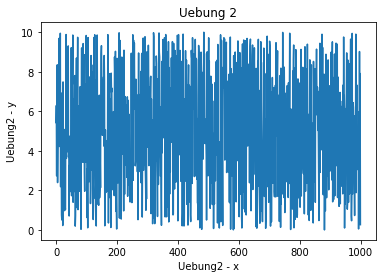

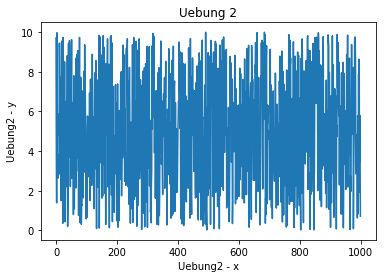

shape x-Vector:  (1000, 3)
shape Theta-Vector:  (3,)
Shape hypothesis result:  (1000,)


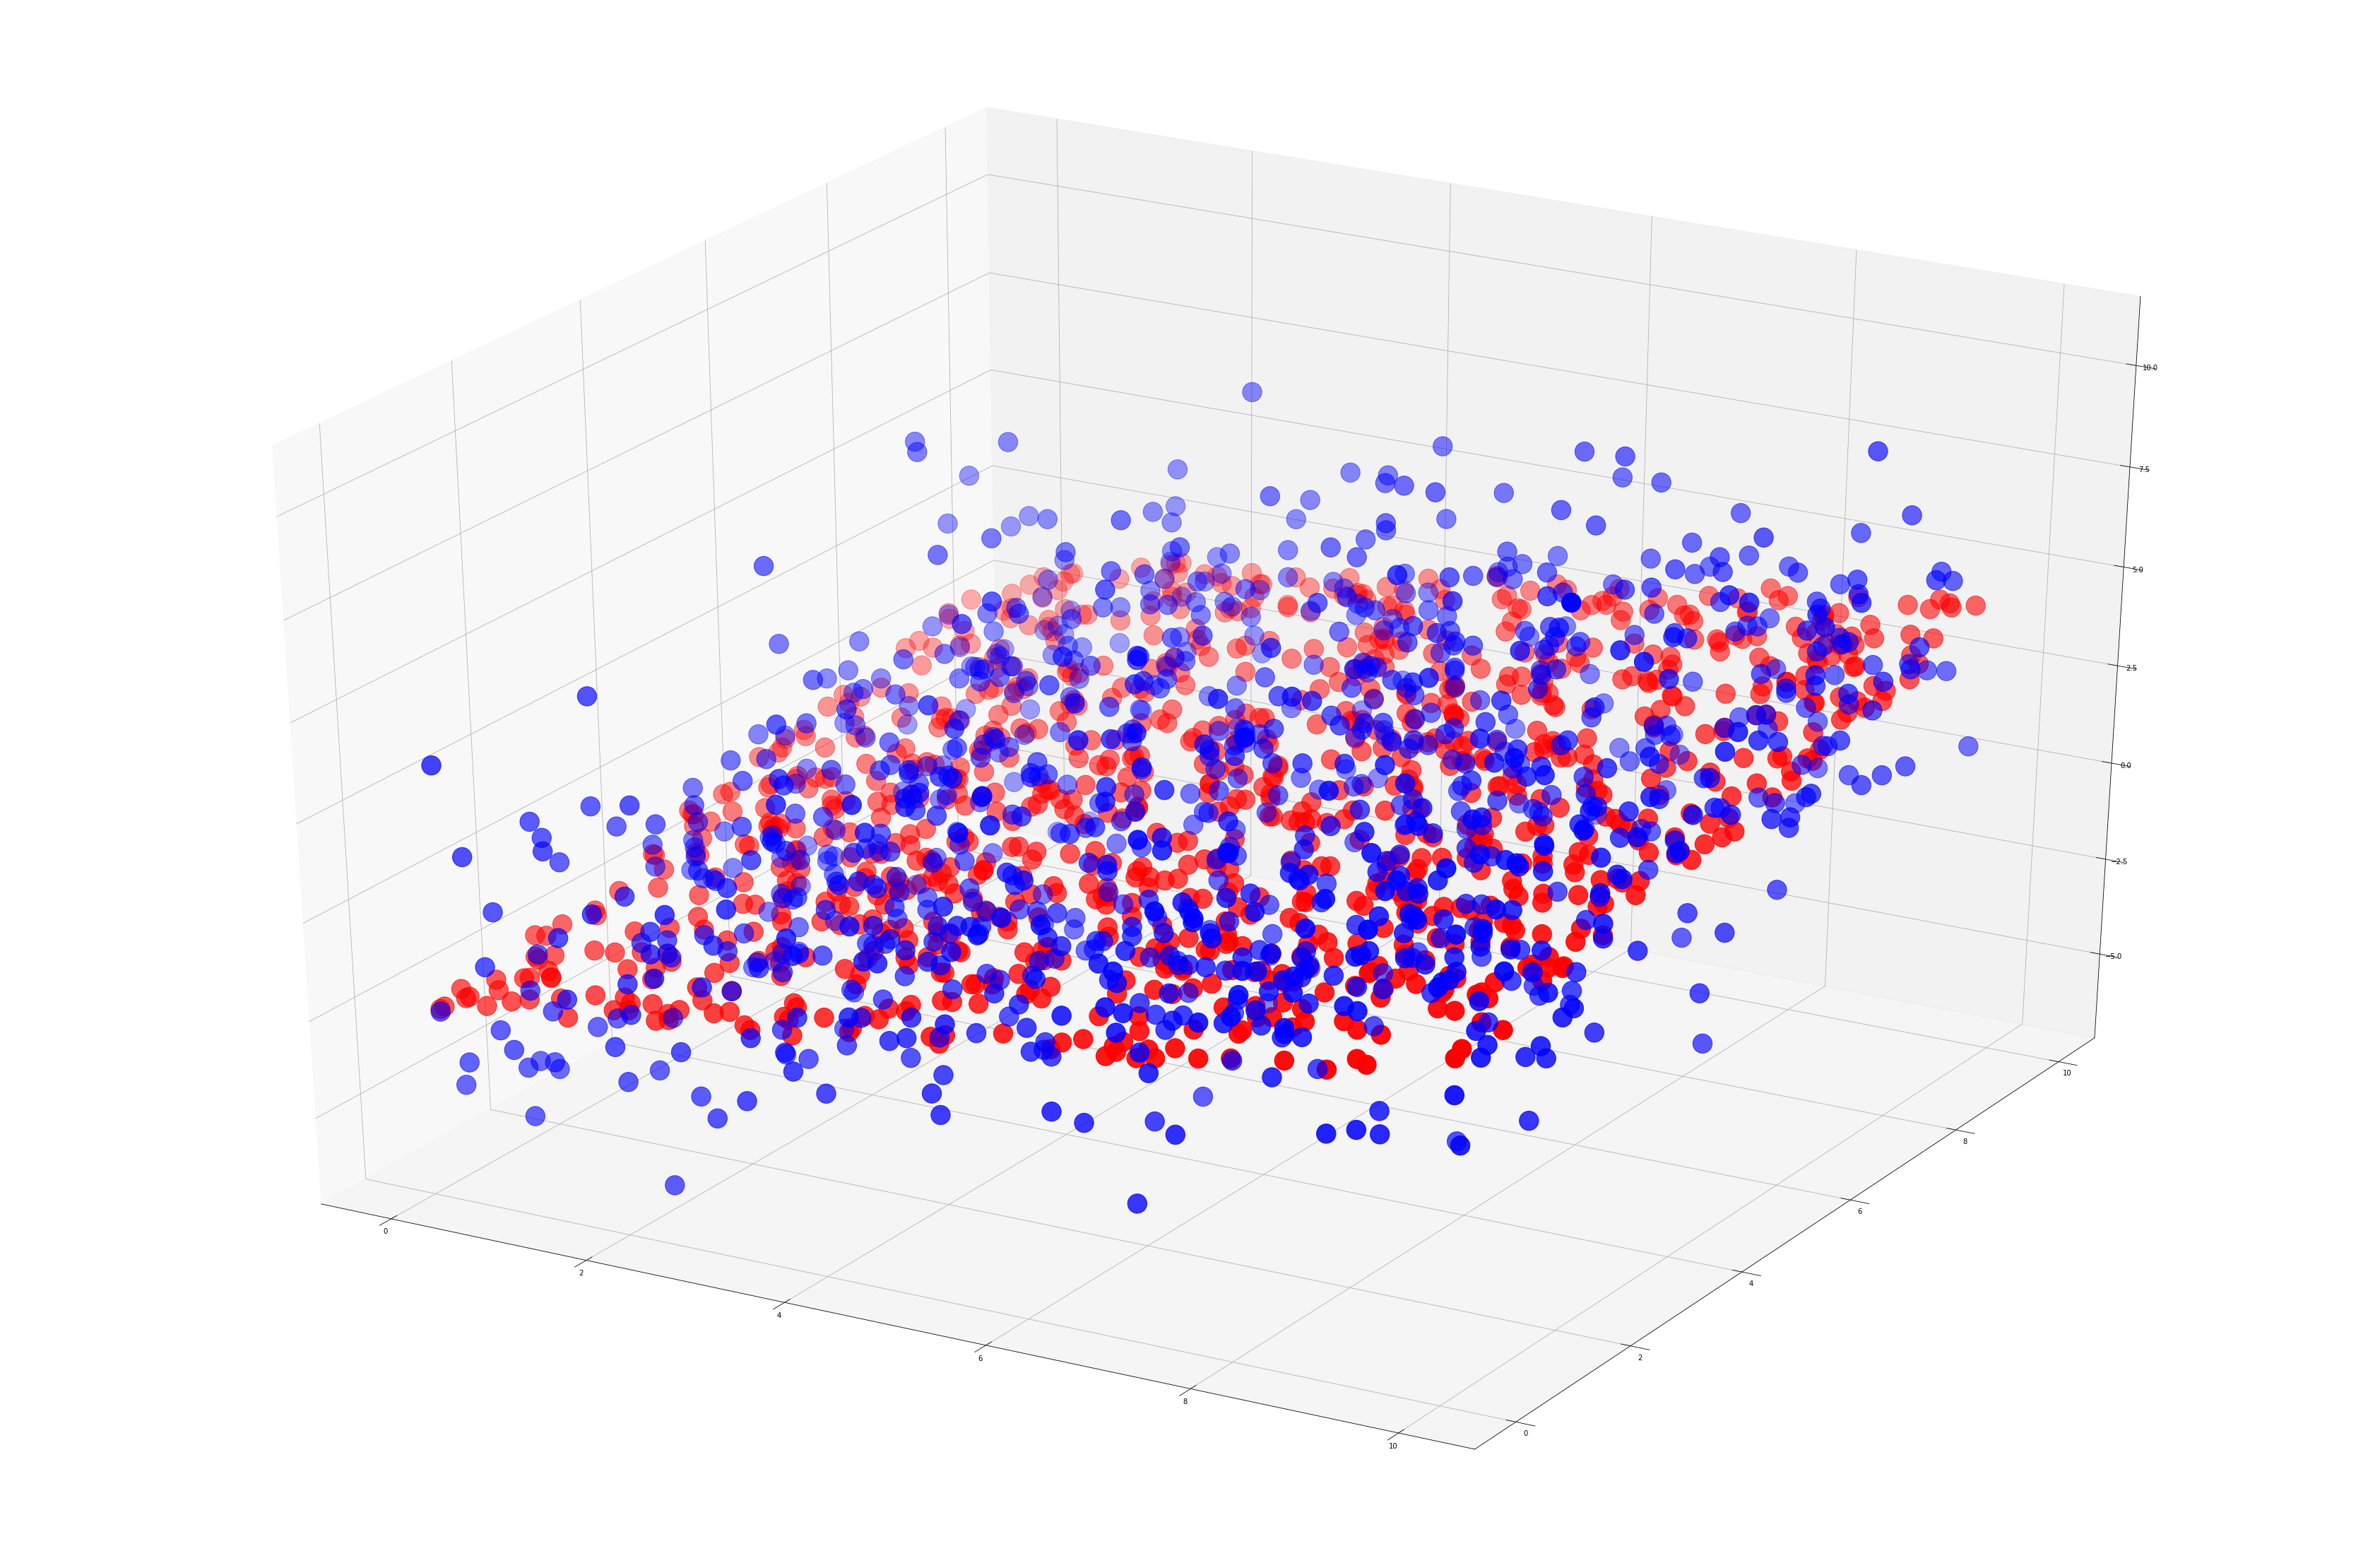

costs:  1.9615374590797137
costs:  1.9615247888225726
costs:  1.9615121437594267
costs:  1.9614995238401733
costs:  1.9614869290148076
costs:  1.9614743592334267
costs:  1.961461814446224
costs:  1.9614492946034952
costs:  1.9614367996556321
costs:  1.9614243295531268
costs:  1.96141188424657
------------------------------------------   10 % mark reached  ----------------------------------------------------------
costs:  1.961399463686649
costs:  1.9613870678241505
costs:  1.9613746966099597
costs:  1.9613623499950574
costs:  1.9613500279305238
costs:  1.9613377303675352
costs:  1.9613254572573664
costs:  1.961313208551388
costs:  1.961300984201067
costs:  1.9612887841579676
------------------------------------------   20 % mark reached  ----------------------------------------------------------
costs:  1.9612766083737507
costs:  1.9612644568001727
costs:  1.9612523293890853
costs:  1.9612402260924382
costs:  1.9612281468622745
costs:  1.9612160916507337
costs:  1.9612040604100498
cost

In [8]:
# Daten: 
# m Beobachtungen
# n Features, hier 2
# d.h. apply along axis 0 bedeuted über alle rows -> axis 0 = alle Reihen axis1 = (eig) alle Spalten
#           x0  x1  x2  -> warum sind Features in den Spalten?? siehe Implementierung: x_ges = np.array([[x_0[i],x_1[i],x_2[i]] for i in range(len(x_1))])
#     m0:   1   1   1
#     m1:   kA  kA  kA
#     m2:   kA  kA  kA
#     m3:   ... ... ...

if __name__ == "__main__":
    interval_min = 0
    interval_max = 10
    number_of_feature_values = 1000 #aka how many training-examples do i have?
    number_of_features = 2 #aka how many x_n values do i have? important for theta
    alpha = 0.0001
    epochs = 1000
    value_to_start_for_all_theta = 1
    
   # x_0 = muss eigentlich komplett 1 sein len(x_1) * 1

    #############
    x_1= np.random.uniform(low=interval_min, high=interval_max, size=(number_of_feature_values,))
    x_2= np.random.uniform(low=interval_min, high=interval_max, size=(number_of_feature_values,))
    x_0 = [1 for i in range(len(x_1))] #np ones
    
    x_ges = np.array([[x_0[i],x_1[i],x_2[i]] for i in range(len(x_1))])
    x_ges = scale(x_ges)
    #############
    
    plot_dataframe_with_args([[i for i in range(len(x_1))], x_1])
    plot_dataframe_with_args([[i for i in range(len(x_2))], x_2])
    
    #############
    theta_vector = np.array([value_to_start_for_all_theta for i in range(number_of_features+1)])
    #############
    
    h = hypothesis(theta=theta_vector)
    y_raw = h(x_ges) #without noise############################################################################# > unser "richtiges" y
    y = np.array([((np.random.normal()*2)+ i) for i in y_raw])
    print("shape x-Vector: ", x_ges.shape)
    print("shape Theta-Vector: ",theta_vector.shape)
    print("Shape hypothesis result: ", y.shape)
    
    plt.figure(figsize=(60, 40))
    ax = plt.axes(projection='3d')
    ax.scatter(x_1[:], x_2[:], y_raw, c='r',s=750)
    ax.scatter(x_1[:], x_2[:], y,c='b',s=750) #blue = with noise
    
    plt.show() 
    #scaled_x = scale(x_ges)   
    costs, theta = iterative_gradient_descent(epochs,theta_vector,alpha, x_ges,y)

# 6) Stellen Sie die gefundene Hyperebene in einem 3D Plot zusammen mit den Daten dar

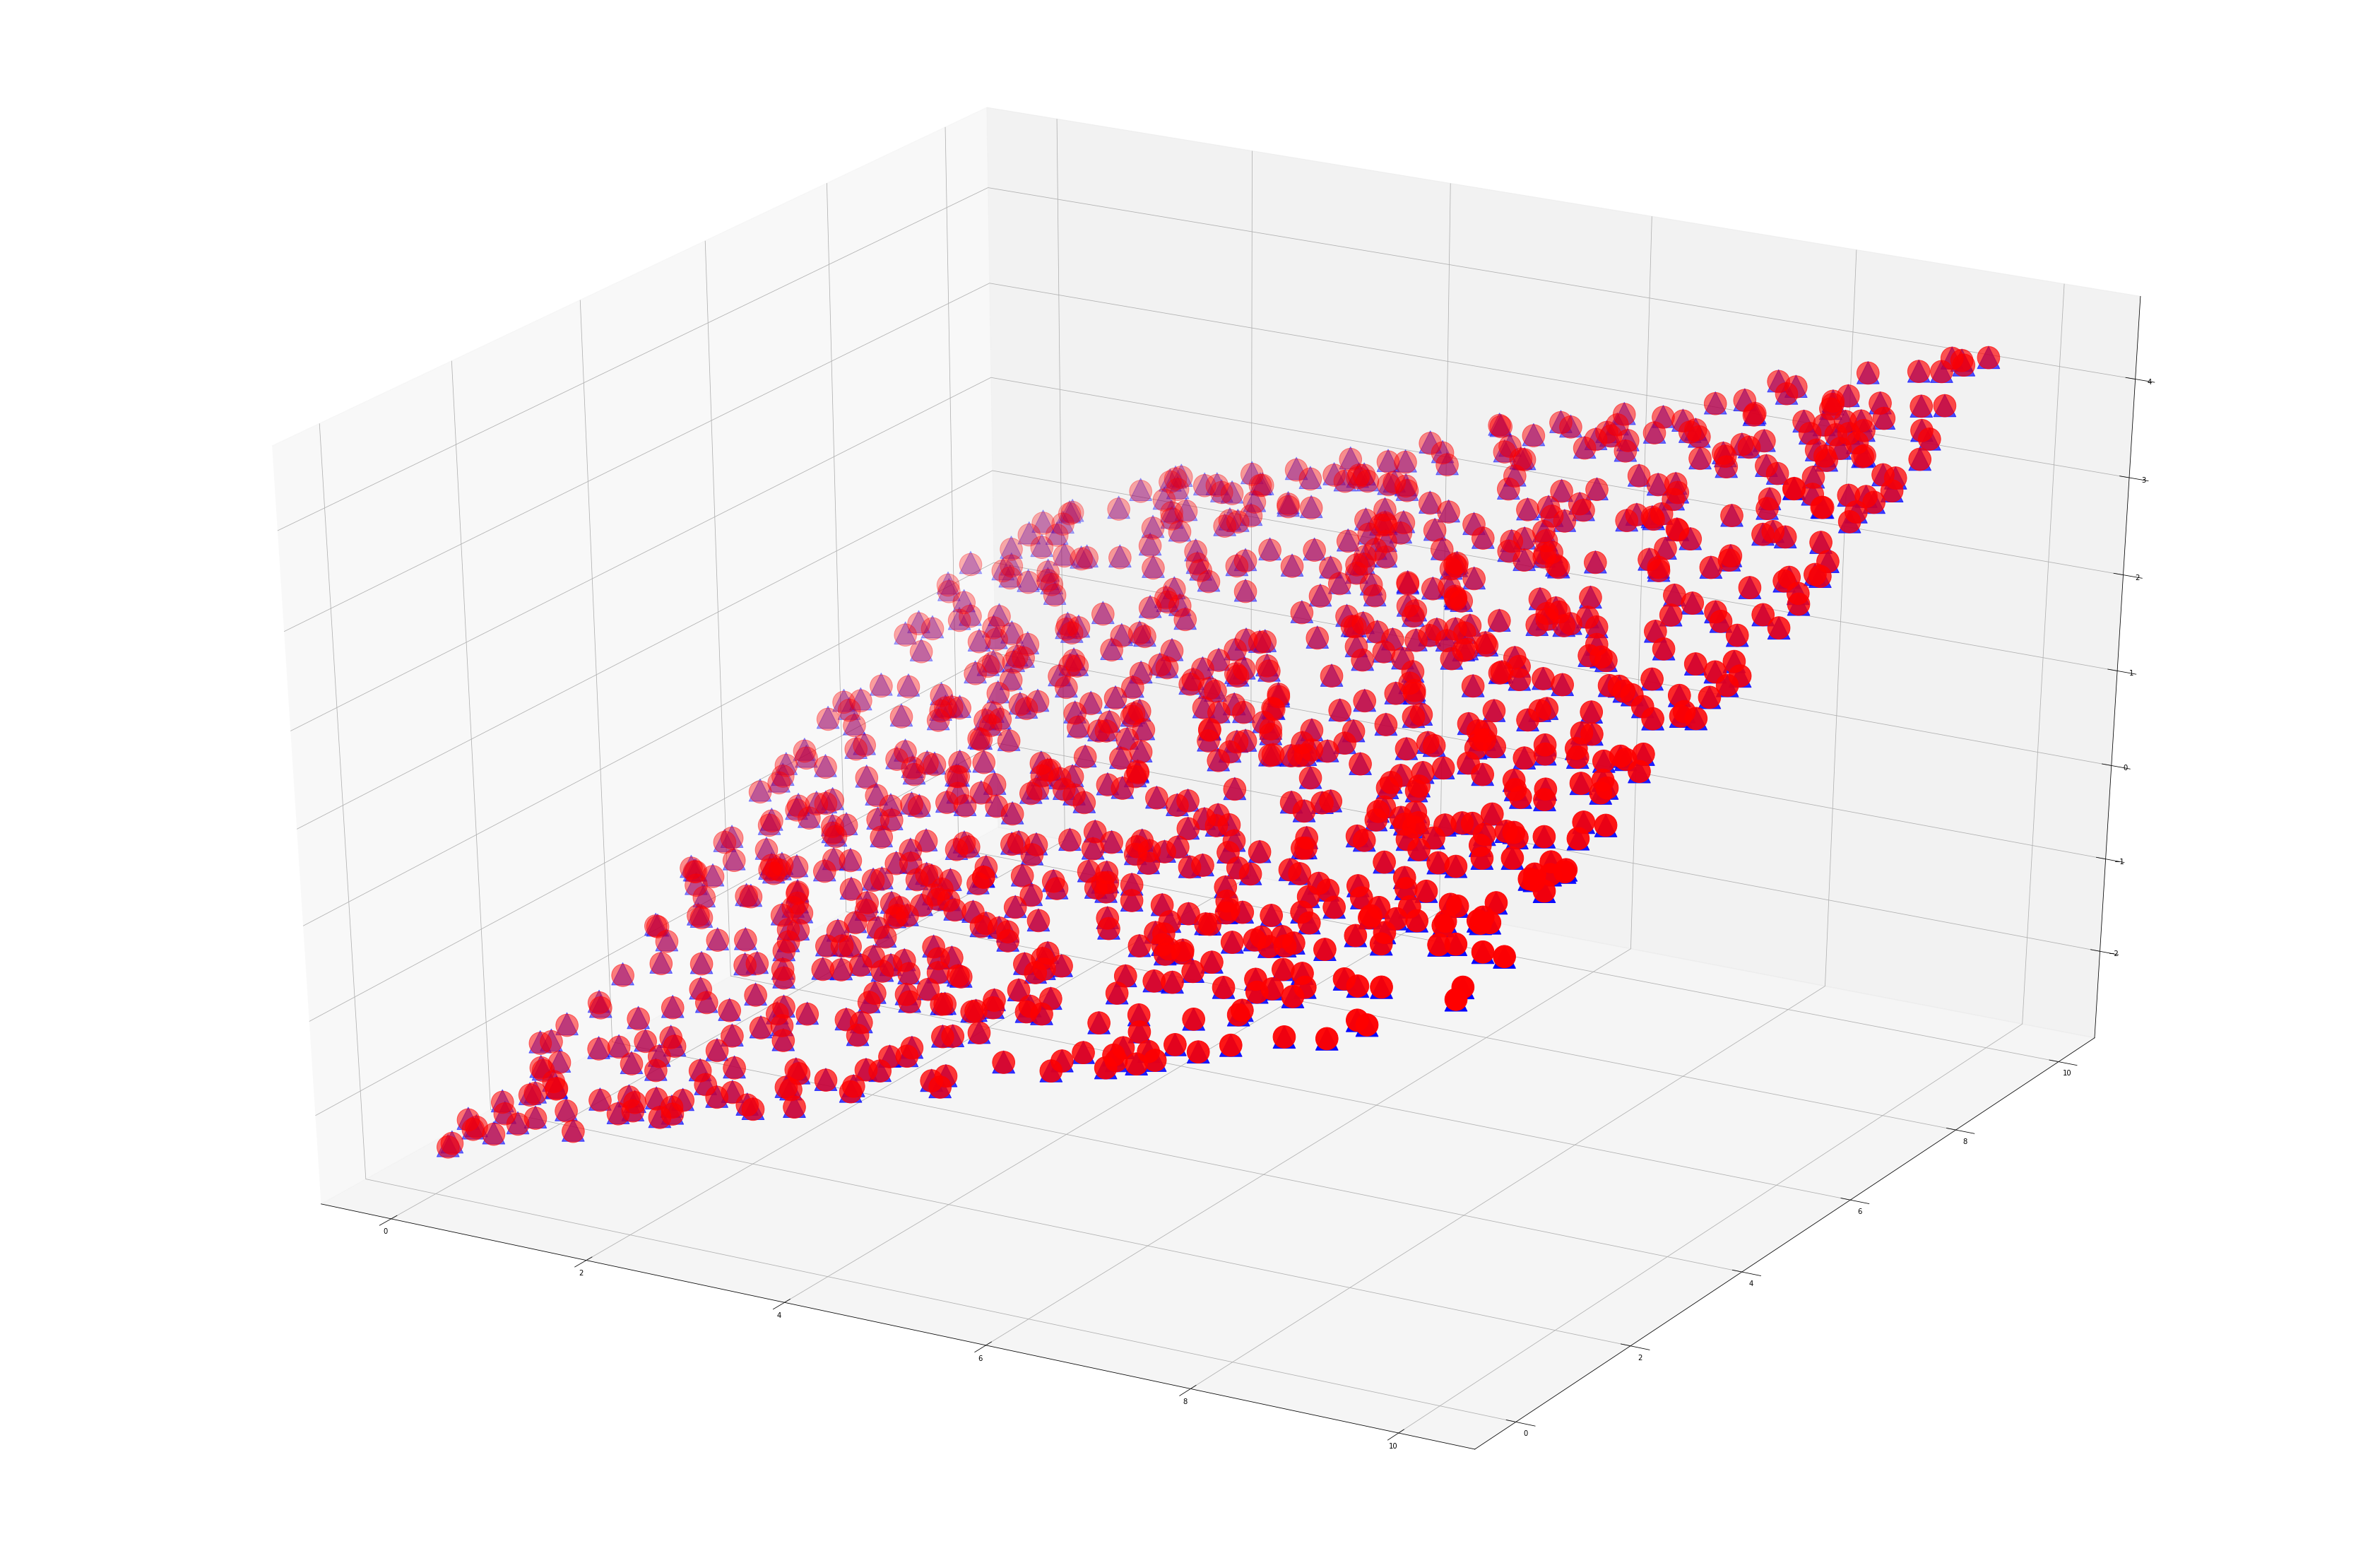

In [9]:
y_after = hypothesis(theta)(x_ges)
plt.figure(figsize=(60, 40))
ax = plt.axes(projection='3d')
ax.scatter(x_1[:], x_2[:], y_raw,c='r',marker='o',s=1000)
ax.scatter(x_1[:], x_2[:], y_after,c='b', marker='^',s=1000)
plt.show()